In [1]:
##Load the python packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from spotpy.objectivefunctions import kge

In [2]:
df = pd.read_csv('New_Variables.csv')
df.head()

,Unnamed: 0,Date,Precipitation,Precipitation_(-1d),Precipitation_(-7d),Volumetric Soil moisture,2m_Temp,surface_runoff,snowmelt,snow_albedo,...,P_evaporation,2m_temperature,lai_hv,lai_lv,volumetric_soil_water_layer_1,volumetric_soil_water_layer_2,Discharge,Evaporation,Sat_Area,Real time storage
0,0,1/14/1990,0.0,0.000,0.000,0.005457,8.307883,0.000000,2.070000e-07,0.854328,...,0.0,287.703251,2.341185,0.514931,0.012860,0.056208,622.0,232.819472,83.057795,1692000
1,1,4/4/1990,0.0,0.000,0.000,0.056118,14.296631,0.000000,0.000000e+00,0.879998,...,0.0,290.727425,2.344631,0.532530,0.061051,0.073915,385.0,280.031540,81.264840,1639600
2,2,4/11/1990,0.0,0.000,0.000,0.022323,17.140956,0.000000,0.000000e+00,0.880004,...,0.0,296.195757,2.345128,0.534078,0.039254,0.077635,36.0,661.206166,80.886614,1626800
3,3,4/20/1990,0.0,0.000,0.000,0.113441,13.940720,0.000006,0.000000e+00,0.880004,...,0.0,291.322648,2.345377,0.535316,0.116727,0.085404,0.0,536.174092,80.579682,1613600
4,4,5/6/1990,0.0,0.319,1.164,0.114180,14.372926,0.000000,2.170000e-19,0.879999,...,0.0,291.243463,2.345296,0.536659,0.118194,0.108626,523.0,563.486792,80.213382,1586200


In [3]:
#check if there is nan
df.isna().sum()

Unnamed: 0                       0
Date                             0
Precipitation                    0
Precipitation_(-1d)              0
Precipitation_(-7d)              0
Volumetric Soil moisture         0
2m_Temp                          0
surface_runoff                   0
snowmelt                         0
snow_albedo                      0
snow_depth                       0
P_evaporation                    0
2m_temperature                   0
lai_hv                           0
lai_lv                           0
volumetric_soil_water_layer_1    0
volumetric_soil_water_layer_2    0
Discharge                        0
Evaporation                      0
Sat_Area                         0
Real time storage                0
dtype: int64

In [4]:
#separate independent and dependent variable
predictor_data = df.iloc[:,2:-1]
predictor_data.head()

,Precipitation,Precipitation_(-1d),Precipitation_(-7d),Volumetric Soil moisture,2m_Temp,surface_runoff,snowmelt,snow_albedo,snow_depth,P_evaporation,2m_temperature,lai_hv,lai_lv,volumetric_soil_water_layer_1,volumetric_soil_water_layer_2,Discharge,Evaporation,Sat_Area
0,0.0,0.000,0.000,0.005457,8.307883,0.000000,2.070000e-07,0.854328,0.0,0.0,287.703251,2.341185,0.514931,0.012860,0.056208,622.0,232.819472,83.057795
1,0.0,0.000,0.000,0.056118,14.296631,0.000000,0.000000e+00,0.879998,0.0,0.0,290.727425,2.344631,0.532530,0.061051,0.073915,385.0,280.031540,81.264840
2,0.0,0.000,0.000,0.022323,17.140956,0.000000,0.000000e+00,0.880004,0.0,0.0,296.195757,2.345128,0.534078,0.039254,0.077635,36.0,661.206166,80.886614
3,0.0,0.000,0.000,0.113441,13.940720,0.000006,0.000000e+00,0.880004,0.0,0.0,291.322648,2.345377,0.535316,0.116727,0.085404,0.0,536.174092,80.579682
4,0.0,0.319,1.164,0.114180,14.372926,0.000000,2.170000e-19,0.879999,0.0,0.0,291.243463,2.345296,0.536659,0.118194,0.108626,523.0,563.486792,80.213382


In [5]:
observed_data = df.iloc[:,20:21]
observed_data.head()
 

,Real time storage
0,1692000
1,1639600
2,1626800
3,1613600
4,1586200


In [6]:
# change the variable name to X and y
X = predictor_data
y = observed_data

#X.head()
#print(y.shape)


In [7]:
print(y.shape)
print(X.shape)

(582, 1)
(582, 18)


In [8]:
# Determine the split indices for 60% training, 20% validation, and 20% test
train_split_index = int(len(X) * 0.6)
val_split_index = int(len(X) * 0.8)

In [9]:
# Split the data into training, validation, and test sets
X_train = X.iloc[:train_split_index]
X_val = X.iloc[train_split_index:val_split_index]
X_test = X.iloc[val_split_index:]

y_train = y.iloc[:train_split_index]
y_val = y.iloc[train_split_index:val_split_index]
y_test = y.iloc[val_split_index:]

# Check the splits
print("Training set size (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation set size (X_val, y_val):", X_val.shape, y_val.shape)
print("Test set size (X_test, y_test):", X_test.shape, y_test.shape)

Training set size (X_train, y_train): (349, 18) (349, 1)
Validation set size (X_val, y_val): (116, 18) (116, 1)
Test set size (X_test, y_test): (117, 18) (117, 1)


In [10]:
y_train = y_train.values.ravel()
print(y_train.shape)

(349,)


In [11]:
y_val = y_val.values.ravel()
print(y_val.shape)

(116,)


In [12]:
y_test = y_test.values.ravel()
print(y_test.shape)

(117,)


In [13]:
# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf.predict(X_val)

# Predict on the test set
y_test_pred = rf.predict(X_test)

In [14]:
# Calculate evaluation metrics for validation set
# Calculate the range of the actual values
range_y_val = observed_data.max() - observed_data.min()
val_rmse = mean_squared_error(y_val, y_val_pred, squared=True)**0.5/range_y_val # Manually calculate the root mean squared error
val_mae = mean_absolute_error(y_val, y_val_pred)/range_y_val
val_kge = kge(y_val, y_val_pred)

In [15]:
# Calculate evaluation metrics for test set
test_rmse = mean_squared_error(y_test, y_test_pred, squared=True)**0.5/range_y_val  # Manually calculate the root mean squared error
test_mae = mean_absolute_error(y_test, y_test_pred)/range_y_val
test_kge = kge(y_test, y_test_pred)

# Print the evaluation metrics for validation set
print(f'Validation RMSE: {val_rmse}')
print(f'Validation MAE: {val_mae}')
print(f'Validation KGE: {val_kge}')

# Print the evaluation metrics for test set
print(f'Test RMSE: {test_rmse}')
print(f'Test MAE: {test_mae}')
print(f'Test KGE: {test_kge}')

Validation RMSE: Real time storage    0.017233
dtype: float64
Validation MAE: Real time storage    0.014978
dtype: float64
Validation KGE: 0.8955436548539016
Test RMSE: Real time storage    0.01633
dtype: float64
Test MAE: Real time storage    0.013848
dtype: float64
Test KGE: 0.856391885522374


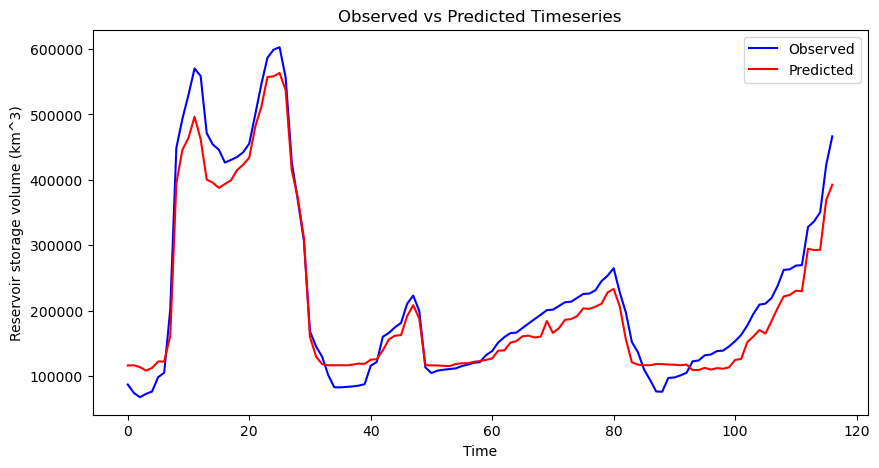

In [16]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Observed', color='blue')
plt.plot(y_test_pred, label='Predicted', color='red')
plt.title('Observed vs Predicted Timeseries')
plt.xlabel('Time')
plt.ylabel('Reservoir storage volume (km^3)')
plt.legend()
plt.savefig('observed_vs_predicted_timeseries_with_all_the_variables.png', dpi=300, bbox_inches='tight')
plt.show()

                          Feature  Importance
17                       Sat_Area    0.997643
7                     snow_albedo    0.000344
16                    Evaporation    0.000326
10                 2m_temperature    0.000289
4                         2m_Temp    0.000287
14  volumetric_soil_water_layer_2    0.000189
15                      Discharge    0.000180
11                         lai_hv    0.000148
13  volumetric_soil_water_layer_1    0.000146
8                      snow_depth    0.000126
3        Volumetric Soil moisture    0.000119
12                         lai_lv    0.000092
6                        snowmelt    0.000061
0                   Precipitation    0.000019
5                  surface_runoff    0.000013
2             Precipitation_(-7d)    0.000010
1             Precipitation_(-1d)    0.000008
9                   P_evaporation    0.000000


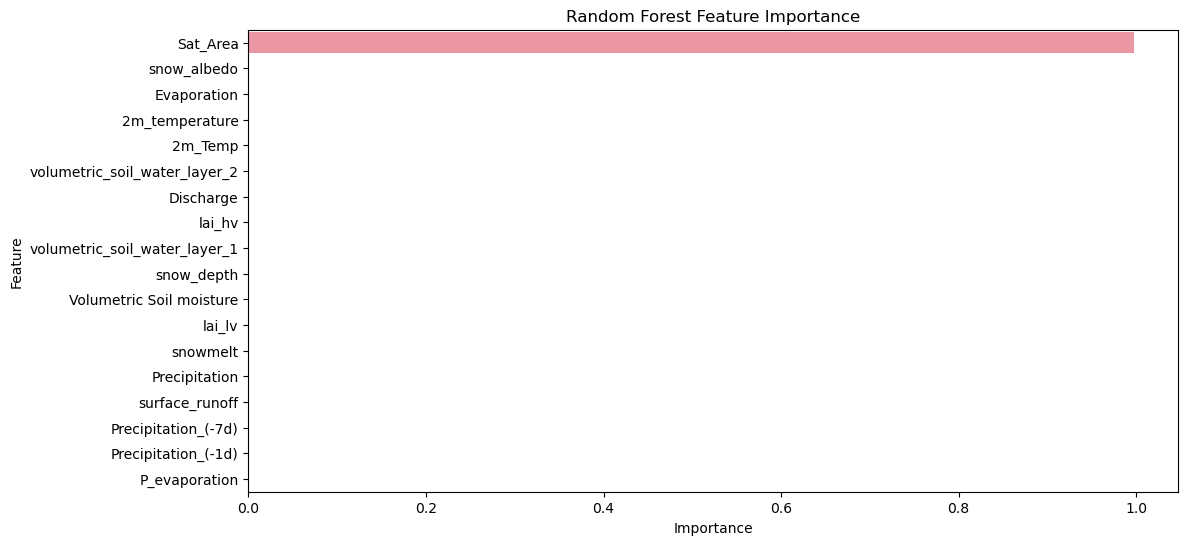

In [17]:
# Import necessary libraries for feature importance
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate feature importances from the trained Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame to visualize the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('Feature importance_including_Area_all_variables.png', dpi=300, bbox_inches='tight')
plt.show()


                          Feature  Importance
7                     snow_albedo    0.000344
16                    Evaporation    0.000326
10                 2m_temperature    0.000289
4                         2m_Temp    0.000287
14  volumetric_soil_water_layer_2    0.000189
15                      Discharge    0.000180
11                         lai_hv    0.000148
13  volumetric_soil_water_layer_1    0.000146
8                      snow_depth    0.000126
3        Volumetric Soil moisture    0.000119
12                         lai_lv    0.000092
6                        snowmelt    0.000061
0                   Precipitation    0.000019
5                  surface_runoff    0.000013
2             Precipitation_(-7d)    0.000010
1             Precipitation_(-1d)    0.000008
9                   P_evaporation    0.000000


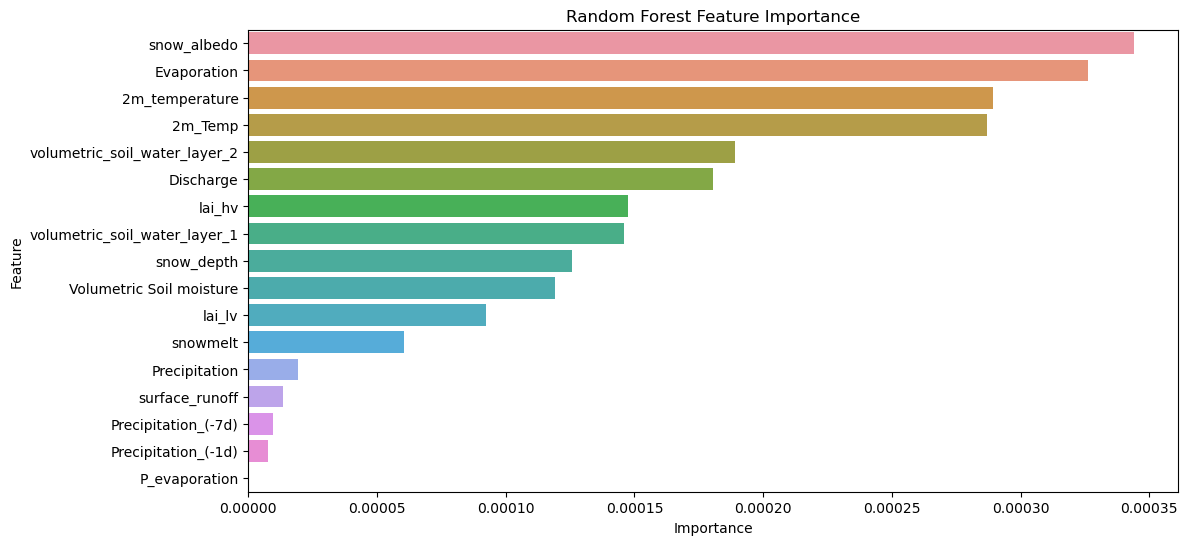

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'feature_importance_df' is already defined
# Filter out 'Sat_Area' from the feature importance DataFrame
filtered_feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'Sat_Area']

# Display the filtered feature importances
print(filtered_feature_importance_df)

# Plot the filtered feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=filtered_feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('Feature importance_all_variables.png', dpi=300, bbox_inches='tight')
plt.show()
